<a href="https://colab.research.google.com/github/ReinaldoDiasAbreu/redes_multicamadas/blob/main/Exerc%C3%ADcio_7_Redes_Neurais_Multicamadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Rede neurais multicamadas

Realizar a classificação da base de dados Wine, e comparando os resultados com os métodos supervisionados e não supervisionados.


Uma rede neural multicamadas é uma rede neural artificial com uma camada de entrada, uma camada de saída e pelo menos uma camada oculta. 
Normalmente, por meio de camadas ocultas, é possível modelar dados não lineares.


Vamos utilizar a base de dados [wine](https://www.kaggle.com/brynja/wineuci), que é o resultado de uma análise química de vinhos cultivados na mesma região na Itália. A análise determinou três classes:
- Classe 1 - 59
- Classe 2 - 71
- Classe 3 - 48

e 13 variáveis:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

**Vamos carregar a base de dados:**

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()

 **Fazer a validação cruzada:**

In [ ]:
from sklearn.model_selection import train_test_split

X_training, X_testing, y_training, y_testing = train_test_split(
   wine.data[:,:12], wine.target, test_size=0.4
)

print(y_training)

[1 1 1 1 0 2 0 1 0 1 0 1 2 2 1 1 1 1 0 0 1 2 0 1 1 2 2 1 2 2 2 2 1 1 1 2 2
 1 1 2 1 2 2 1 1 1 0 0 0 0 0 0 0 0 2 0 2 1 0 1 0 2 2 0 2 1 2 1 1 1 0 2 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 2 0 2 0 2 1 1 0 2 1 1 1 1 0 1 0 0 1 1 2]


**Treinar o modelo:**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='relu')
clf.fit(X_training, y_training)

yp=clf.predict(X_testing)

**Analisar os resultados:**

Matriz de confusão, sem normalizar
[[23  1  0]
 [ 6 19  2]
 [ 0  0 21]]
Matriz de confusão normalizada
[[0.95833333 0.04166667 0.        ]
 [0.22222222 0.7037037  0.07407407]
 [0.         0.         1.        ]]


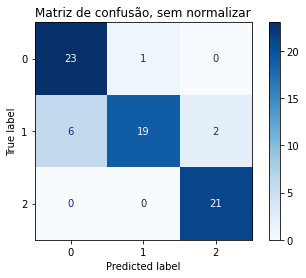

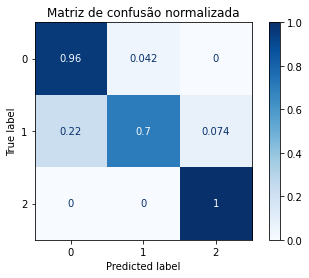

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_testing, y_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_testing, yp))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        24
           1       0.95      0.70      0.81        27
           2       0.91      1.00      0.95        21

    accuracy                           0.88        72
   macro avg       0.89      0.89      0.88        72
weighted avg       0.89      0.88      0.87        72



**Iremos utilizar a correlação para tentar melhorar os resultados:**



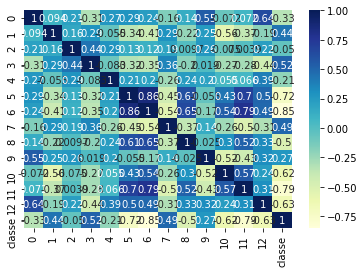

In [305]:
import seaborn as sns
import numpy as np
import pandas

tabela = pandas.DataFrame(wine.data)
tabela['classe'] = wine.target
correlacoes = tabela.corr()
sns.heatmap(correlacoes, cmap="YlGnBu", annot = True)

**Usando as variáveis mais correlacionadas com a saída**

In [ ]:
#wine_n = np.array(wine.data[:,[5,6]])
#Xn_training, Xn_testing, yn_training, yn_testing = train_test_split(
#   wine_n, wine.target, test_size=0.4
#)
Xn_training, Xn_testing, yn_training, yn_testing = X_training[:,[5, 6, 8, 11]], X_testing[:,[5, 6, 8, 11]], y_training, y_testing

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='relu')
clf.fit(Xn_training, yn_training)

yp=clf.predict(Xn_testing)

Matriz de confusão, sem normalizar
[[17  7  0]
 [ 4 21  2]
 [ 0  1 20]]
Matriz de confusão normalizada
[[0.70833333 0.29166667 0.        ]
 [0.14814815 0.77777778 0.07407407]
 [0.         0.04761905 0.95238095]]


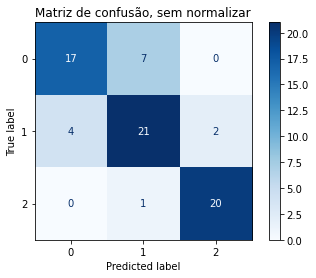

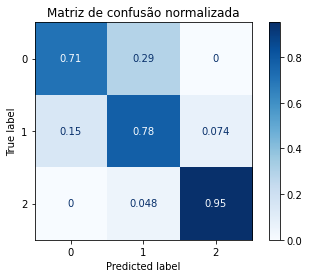

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, Xn_testing, yn_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
print(classification_report(yn_testing, yp))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.72      0.78      0.75        27
           2       0.91      0.95      0.93        21

    accuracy                           0.81        72
   macro avg       0.81      0.81      0.81        72
weighted avg       0.81      0.81      0.80        72



**Usando 2 variáveis mais correlacionadas com a saída**

In [ ]:
Xn2_training, Xn2_testing, yn2_training, yn2_testing = X_training[:,[5, 6]], X_testing[:,[5, 6]], y_training, y_testing

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='relu')
clf.fit(Xn2_training, yn2_training)

yp=clf.predict(Xn2_testing)

Matriz de confusão, sem normalizar
[[16  8  0]
 [ 4 21  2]
 [ 0  2 19]]
Matriz de confusão normalizada
[[0.66666667 0.33333333 0.        ]
 [0.14814815 0.77777778 0.07407407]
 [0.         0.0952381  0.9047619 ]]


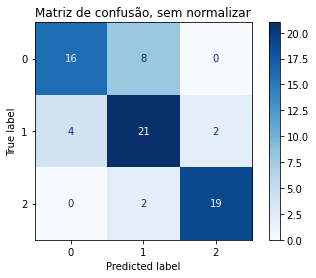

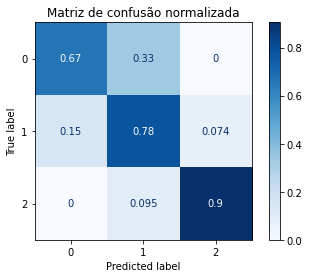

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, Xn2_testing, yn2_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
print(classification_report(yn2_testing, yp))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.68      0.78      0.72        27
           2       0.90      0.90      0.90        21

    accuracy                           0.78        72
   macro avg       0.79      0.78      0.79        72
weighted avg       0.78      0.78      0.78        72



## Classificação Supervisionada

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

**Usando Regressão Logística**

In [ ]:
classificador = LogisticRegression(max_iter=2000)
classificador.fit(X_training, y_training)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yp = classificador.predict(X_testing)

Matriz de confusão, sem normalizar
[[24  0  0]
 [ 4 21  2]
 [ 0  0 21]]
Matriz de confusão normalizada
[[1.         0.         0.        ]
 [0.14814815 0.77777778 0.07407407]
 [0.         0.         1.        ]]


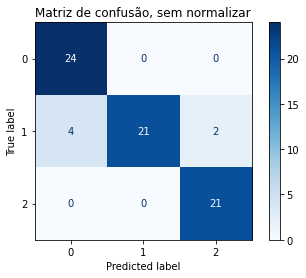

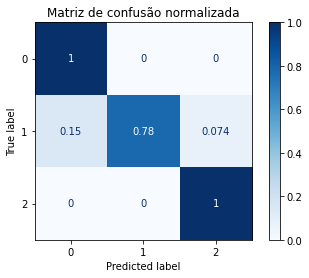

In [ ]:
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classificador, X_testing, y_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
print(classification_report(y_testing, yp))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.78      0.88        27
           2       0.91      1.00      0.95        21

    accuracy                           0.92        72
   macro avg       0.92      0.93      0.92        72
weighted avg       0.93      0.92      0.91        72



**Usando Árvore de Decisão**

In [ ]:
arvore = DecisionTreeClassifier(criterion="gini")
arvore.fit(X_training, y_training)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

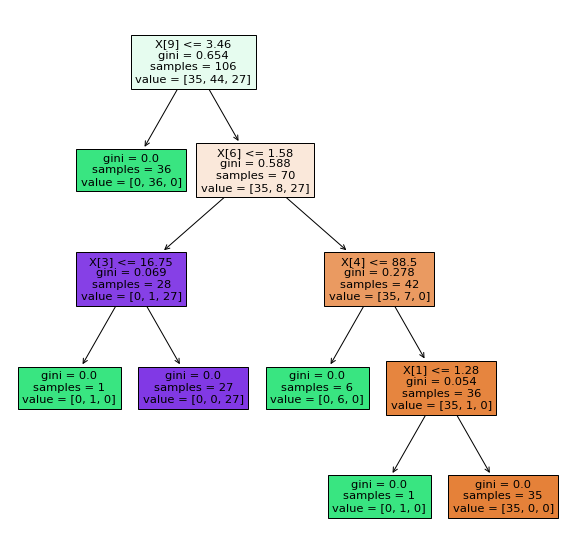

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
figura, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
t = tree.plot_tree(arvore, filled=True)

In [ ]:
yp = arvore.predict(X_testing)

Matriz de confusão, sem normalizar
[[24  0  0]
 [ 2 23  2]
 [ 0  0 21]]
Matriz de confusão normalizada
[[1.         0.         0.        ]
 [0.07407407 0.85185185 0.07407407]
 [0.         0.         1.        ]]


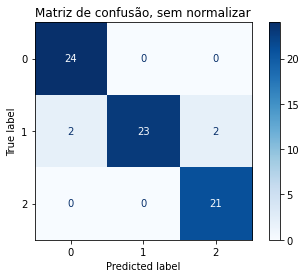

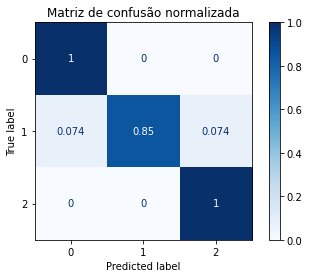

In [ ]:
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(arvore, X_testing, y_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
print(classification_report(y_testing, yp))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.85      0.92        27
           2       0.91      1.00      0.95        21

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.94        72
weighted avg       0.95      0.94      0.94        72



**Usando o K-NN**

In [308]:
from sklearn.neighbors import KNeighborsClassifier

# Definindo modelo com 3 vizinhos
knn = KNeighborsClassifier(n_neighbors=3)

In [311]:
knn.fit(X_training, y_training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [312]:
resultado = knn.predict(X_testing)
resultado

array([0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0,
       2, 0, 1, 2, 0, 0])

Matriz de confusão, sem normalizar
[[23  0  1]
 [11 14  2]
 [ 1  0 20]]
Matriz de confusão normalizada
[[0.95833333 0.         0.04166667]
 [0.40740741 0.51851852 0.07407407]
 [0.04761905 0.         0.95238095]]


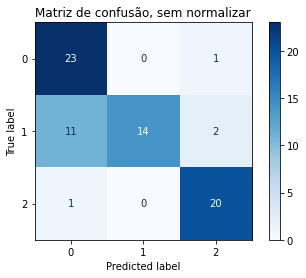

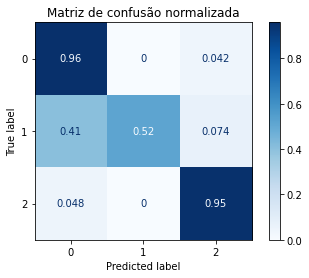

In [313]:
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_testing, y_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [314]:
print(classification_report(y_testing, resultado))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       1.00      0.52      0.68        27
           2       0.87      0.95      0.91        21

    accuracy                           0.79        72
   macro avg       0.84      0.81      0.79        72
weighted avg       0.85      0.79      0.78        72



## Classificação Não Supervisionada - Kmeans

In [ ]:
X_training2 = X_training
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=2000)

In [ ]:
kmeans.fit(X_training2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1], dtype=int32)

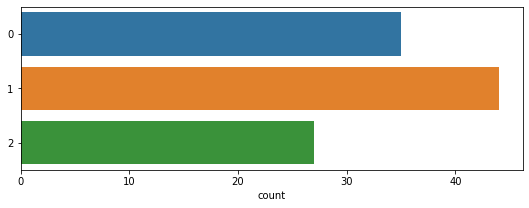

In [ ]:
import seaborn as sp
plt.figure(1 , figsize = (9, 3))
sp.countplot(y = y_training)
plt.show()

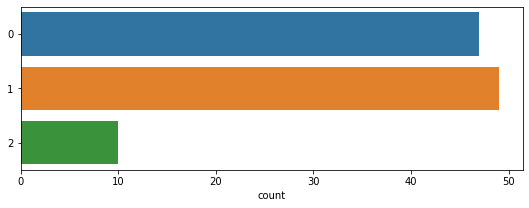

In [ ]:
plt.figure(1 , figsize = (9, 3))
sp.countplot(y = kmeans.labels_)
plt.show()

## Utilizando Regressão Linear

In [372]:
print("Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\n    Alcalinity of Ash:            10.6  30.0    19.5   3.3\n    Magnesium:                    70.0 162.0    99.7  14.3\n    Total Phenols:                0.98  3.88    2.29  0.63\n    Flavanoids:                   0.34  5.08    2.03  1.00\n    Nonflavanoid Phenols:         0.13  0.66    0.36  0.12\n    Proanthocyanins:              0.41  3.58    1.59  0.57\n    Colour Intensity:              1.3  13.0     5.1   2.3\n    Hue:                          0.48  1.71    0.96  0.23\n    OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71\n    Proline:                       278  1680     746   315\n    ============================= ==== ===== ======= =====\n\n    ")

Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Magnesium:                    70.0 162.0    99.7  14.3
    Total Phenols:                0.98  3.88    2.29  0.63
    Flavanoids:                   0.34  5.08    2.03  1.00
    Nonflavanoid Phenols:         0.13  0.66    0.36  0.12
    Proanthocyanins:              0.41  3.58    1.59  0.57
    Colour Intensity:              1.3  13.0     5.1   2.3
    Hue:                          0.48  1.71    0.96  0.23
    OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71
    Proline:                       278  1680     746   315
    ===========================

In [523]:
var_dep = 10
print("Mean: ", np.mean(wine.data[:,var_dep]) , " - Var: ", np.var(wine.data[:,var_dep]), " - SD: ", np.std(wine.data[:,var_dep]))

Mean:  0.9574494382022471  - Var:  0.051951449690695616  - SD:  0.22792860656507252


In [548]:
var_ind = 5
print("Mean: ", np.mean(wine.data[:,var_ind]) , " - Var: ", np.var(wine.data[:,var_ind]), " - SD: ", np.std(wine.data[:,var_ind]))

Mean:  2.295112359550562  - Var:  0.3894890323191517  - SD:  0.6240905641965369


In [549]:
wine.data[:,var_ind]

array([2.8 , 2.65, 2.8 , 3.85, 2.8 , 3.27, 2.5 , 2.6 , 2.8 , 2.98, 2.95,
       2.2 , 2.6 , 3.1 , 3.3 , 2.85, 2.8 , 2.95, 3.3 , 2.7 , 3.  , 2.41,
       2.61, 2.48, 2.53, 2.63, 2.85, 2.4 , 2.95, 2.65, 3.  , 2.86, 2.42,
       2.95, 2.35, 2.7 , 2.6 , 2.45, 2.4 , 3.  , 3.15, 2.45, 3.25, 2.64,
       3.  , 2.85, 3.25, 3.1 , 2.75, 2.88, 2.72, 2.45, 3.88, 3.  , 2.6 ,
       2.96, 3.2 , 3.  , 3.4 , 1.98, 2.05, 2.02, 2.1 , 3.5 , 1.89, 2.42,
       2.98, 2.11, 2.53, 1.85, 1.1 , 2.95, 1.88, 3.3 , 3.38, 1.61, 1.95,
       1.72, 1.9 , 2.83, 2.42, 2.2 , 2.  , 1.65, 2.2 , 2.2 , 1.78, 1.92,
       1.95, 2.2 , 1.6 , 1.45, 1.38, 2.45, 3.02, 2.5 , 1.6 , 2.55, 3.52,
       2.85, 2.23, 1.45, 2.56, 2.5 , 2.2 , 1.68, 1.65, 1.38, 2.36, 2.74,
       3.18, 2.55, 1.75, 2.48, 2.56, 2.46, 1.98, 2.  , 1.63, 2.  , 2.9 ,
       3.18, 2.2 , 2.62, 2.86, 2.6 , 2.74, 2.13, 2.22, 2.1 , 1.51, 1.3 ,
       1.15, 1.7 , 2.  , 1.62, 1.38, 1.79, 1.62, 2.32, 1.54, 1.4 , 1.55,
       2.  , 1.38, 1.5 , 0.98, 1.7 , 1.93, 1.41, 1.

In [550]:
np.corrcoef(wine.data[:,var_dep], wine.data[:,var_ind])

array([[1.        , 0.43368134],
       [0.43368134, 1.        ]])

**Escolhendo a variável mais corralacionada com o alvo**

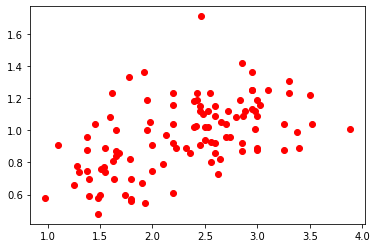

In [552]:
X, X_test = X_training[:, var_ind], X_testing[:, var_ind]
y, y_test = X_training[:, var_dep], X_testing[:, var_dep]

plt.scatter(X, y, color = 'red')
plt.show()

**Definindo e treinando o o Modelo**

In [553]:
X = X.reshape(-1,1)

In [554]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [555]:
reg_pred = model.predict(X_test.reshape(-1,1))
reg_pred

array([1.05725021, 0.91141099, 0.88042015, 1.05725021, 1.05725021,
       0.89135809, 0.80020858, 1.02261339, 0.95333976, 0.8530753 ,
       0.91141099, 1.08641805, 0.94787079, 0.85672128, 0.907765  ,
       1.05725021, 1.0207904 , 0.80020858, 0.94787079, 1.04631226,
       1.11193991, 0.8895351 , 1.01167545, 1.05725021, 0.98797658,
       1.04813526, 0.75645681, 0.89318108, 0.96610069, 1.0207904 ,
       0.79291662, 0.79838559, 0.99344555, 1.24866418, 1.02990535,
       1.13016982, 0.907765  , 0.91505697, 0.85672128, 1.06818815,
       0.83666838, 0.81114652, 1.02625937, 0.92052594, 0.8530753 ,
       0.97521564, 0.80385456, 1.08459506, 0.99891452, 0.81661549,
       0.84213735, 1.09371001, 0.83849137, 1.14839972, 0.86036726,
       0.86583623, 1.0025605 , 1.12652384, 0.94787079, 0.91141099,
       1.07548011, 1.12652384, 0.92964089, 1.09371001, 0.92052594,
       1.12105487, 0.85672128, 1.14293075, 0.93146388, 0.84760633,
       1.06636516, 0.88406613])

**Resultados**

In [563]:
print('linear model coeff (w): {}'
.format(model.coef_))
print('linear model intercept (b): {:.3f}'
.format(model.intercept_))
print('R-squared score (training): {:.3f}'
.format(model.score(X, y)))
print('R-squared score (test): {:.3f}'
.format(model.score(X_test.reshape(-1,1), y_test)))

linear model coeff (w): [0.18229903]
linear model intercept (b): 0.547
R-squared score (training): 0.273
R-squared score (test): 0.058


**Comparação entre valores preditos e teste**

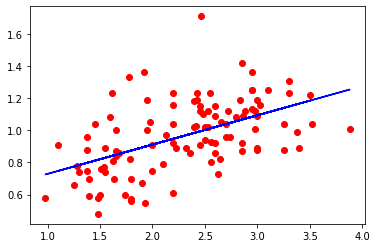

In [560]:
plt.scatter(X, y, color = 'red')
plt.plot(X, model.predict(X.reshape(-1,1)), color = 'blue')
plt.show()

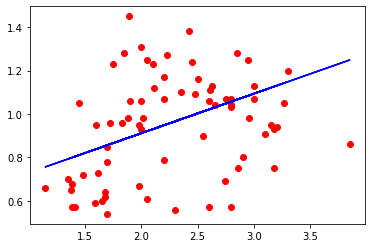

In [558]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, reg_pred, color = 'blue')
plt.show()

Fontes:

[Dataset Wine disponível no Kaggle](https://www.kaggle.com/brynja/wineuci)

[Dataset Wine UC Irvine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine)

[Playground tensorflow](http://playground.tensorflow.org/)

[Testing classifiers for wine variety prediction](https://www.kaggle.com/brynja/testing-classifiers-for-wine-variety-prediction)

[Wine classification using Tensorflow with 100% acc](https://www.kaggle.com/kollidatta/wine-classification-using-tensorflow-with-100-acc)

[Aula sobre classificação](https://colab.research.google.com/drive/1aidq_Lpmp6b5IiDCxvgWmcakMmuQh7qa?usp=sharing)


